**MODELAGEM DE PREÇO DE AÇÕES E PREVISÕES**

Construir um Modelo de Previsão de Preços de Ações

 - Esses modelos são usados para prever o preço de uma ação ou um índice para um período futuro.
 - baixar os preços das ações de qualquer uma das empresas listadas publicamente, no Yahoo Finance.
 - Esses dados são conhecidos como dados de séries temporais univariadas. Você pode usar modelos da classe ARIMA (AR, MA, ARMA, ARIMA) ou usar modelos de Suavização Exponencial.
 - Verificar os modelos de suavização exponencial.

### Bibliotecas e dados

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Ferramentas gráficas
import seaborn as sns
from seaborn import regression
#!pip install mplfinance
#import mplfinance as mpf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [31]:
# Símbolo da ação desejada
ticker = 'PETR3.SA'

# Obtenha os dados diários
dados = yf.download(ticker, start='2023-06-01', interval='1d')
dados.dropna()
dados.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-11,39.209999,39.639999,39.000000,39.430000,39.430000,8502900
2024-01-12,39.900002,40.070000,39.610001,39.639999,39.639999,5163800
2024-01-15,39.360001,40.040001,39.310001,40.040001,40.040001,2358000
2024-01-16,40.000000,40.250000,39.590000,39.599998,39.599998,11899500
2024-01-17,39.349998,39.570000,39.220001,39.299999,39.299999,5083100


### Analise Exploratória

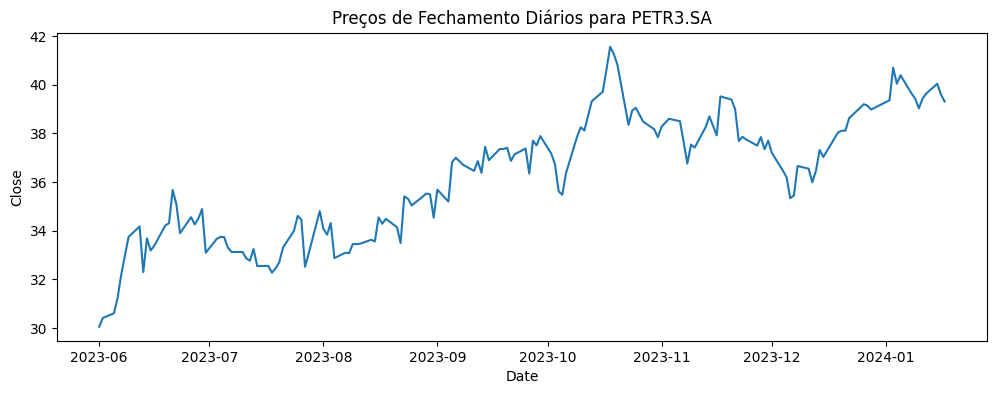

In [5]:
# gráfico da cotação selecionada
plt.figure(figsize=(12, 4))
plt.title(f'Preços de Fechamento Diários para {ticker}')
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(dados["Close"])
plt.show();

In [6]:
# Gráfico interativo

df = dados.reset_index() # Desindexando a coluna da data

fig1 =px.line(df, x=df['Date'], y=df['Close'])
fig1.show()

In [7]:
# Formato de velas
fig2 = go.Figure(data=[go.Candlestick(x=df.Date,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name="plot")])
fig2.show()

**INFORMAÇÕES SOBRE A COMPANHIA**

In [8]:
# Coletando as informações disponiveis da companhia - income statement
petr = yf.Ticker("PETR3.SA")

In [9]:
# Demonstração de resultados dos exercicios - DRE (download dados)
dre = petr.quarterly_income_stmt.to_excel('DRE.xlsx')

In [ ]:
#Informações anulalizadas
petr.income_stmt

In [ ]:
# Balanço patrimonial (anualiz.)
petr.balance_sheet

In [ ]:
# Resultados trimestrais consolidados
petr.quarterly_balance_sheet.T

In [ ]:
petr.get_income_stmt() # Infos ANUALIZADAS (ULT. 3 ANOS)

In [13]:
# Acionistas Majoritários - sem detalhes
petr.major_holders

Breakdown,Value
insidersPercentHeld,0.50259
institutionsPercentHeld,0.20199
institutionsFloatPercentHeld,0.40608
institutionsCount,289.00000


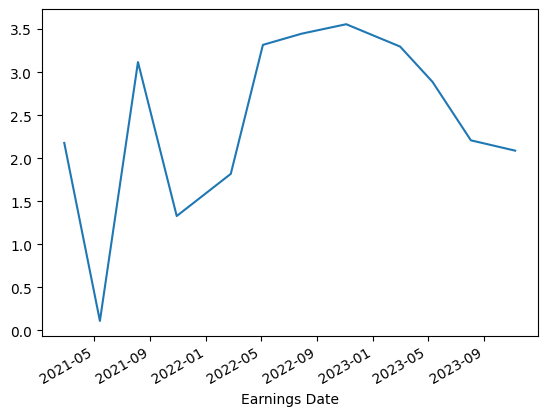

In [18]:
# Dividendos estimados e entregues
petr.earnings_dates['Reported EPS'].plot();

In [15]:
dre = dre.T

**Basic Average Shares:** É o número médio ponderado de ações em circulação durante um período, não considerando potenciais diluições.

In [ ]:
# Quantidade de ações
dre['Basic Average Shares']

2023-09-30    13015465561.0
2023-06-30    13044201261.0
2023-03-31    13044201261.0
2022-12-31    13044201261.0
2022-09-30    13044201261.0
Name: Basic Average Shares, dtype: object

* Aprox 0,3% das ações da companhia são negociadas por dia.
* Aprox. 50% do peso do Ibovespa é composto por PETR3 e PETR4

Logo, a volatilidade de 50% do valor do índice de ações brasileiro depende de apenas 0,3% das ações de uma única empresa.  


**Basic EPS (Earnings Per Share):** É uma medida de lucratividade por ação, calculada dividindo o lucro líquido disponível para acionistas pelo número médio ponderado de ações em circulação. Reflete o ganho por ação para os acionistas comuns.

In [23]:
dre['Basic EPS']

2023-09-30    0.419194
2023-06-30        0.45
2023-03-31        0.56
2022-12-31    0.632082
Name: Basic EPS, dtype: object

**Cost Of Revenue:** Indica os custos diretamente associados à produção ou aquisição de bens vendidos pela empresa.

In [25]:
dre['Cost Of Revenue']

2023-09-30    11982000000.0
2023-06-30    11342000000.0
2023-03-31    12658000000.0
2022-12-31    15592000000.0
Name: Cost Of Revenue, dtype: object

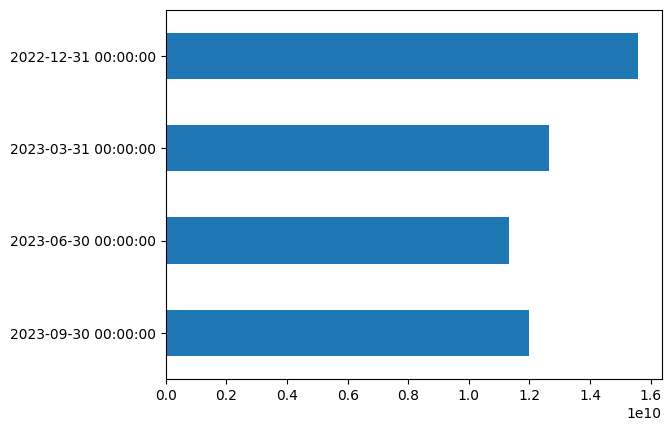

In [24]:
dre['Cost Of Revenue'].plot(kind='barh');

**EBITDA:** Significa Lucro Antes de Juros, Impostos, Depreciação e Amortização. É uma medida do desempenho operacional, excluindo efeitos financeiros e não operacionais.

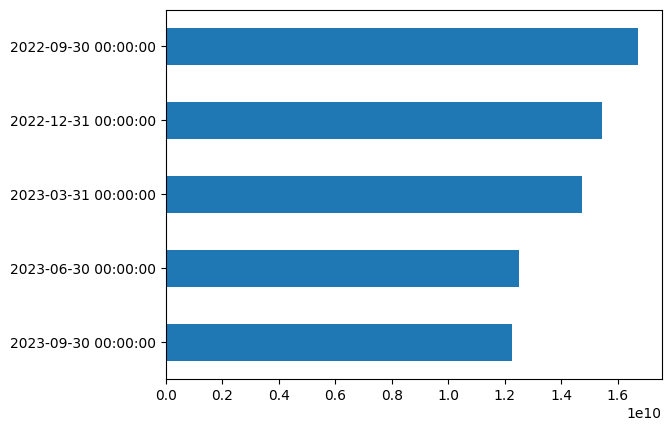

In [ ]:
dre['EBITDA'].plot(kind='barh');

**General And Administrative Expense:** Inclui despesas administrativas e gerais associadas à gestão e operação geral da empresa, como salários de funcionários administrativos, aluguel de escritórios e despesas de escritório.

In [26]:
dre['General And Administrative Expense']

2023-09-30    734000000.0
2023-06-30    680000000.0
2023-03-31    671000000.0
2022-12-31    566000000.0
Name: General And Administrative Expense, dtype: object

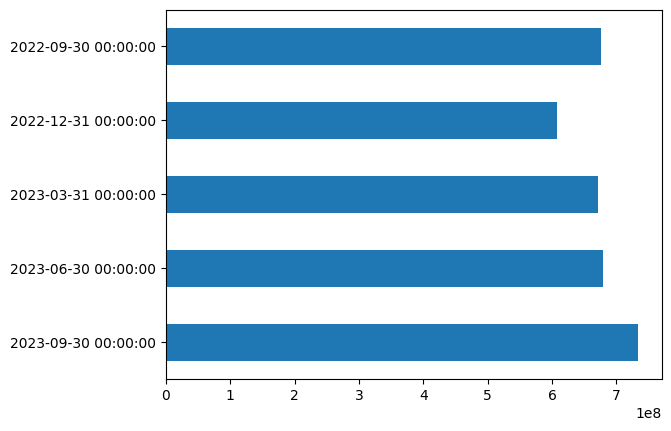

In [ ]:
dre['General And Administrative Expense'].plot(kind='barh');

**Gross Profit:** Calculado subtraindo o custo dos produtos vendidos (Cost Of Revenue) das receitas totais. Representa o lucro bruto antes das despesas operacionais e impostos.

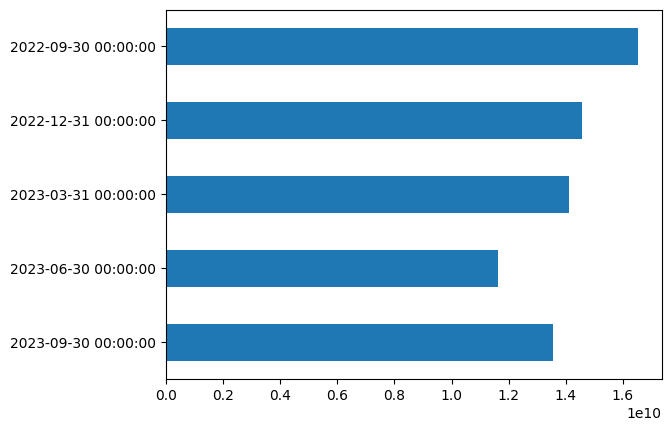

In [ ]:
dre['Gross Profit'].plot(kind='barh');

**Net Income:** É o lucro líquido total da empresa, antes de considerar participações minoritárias.

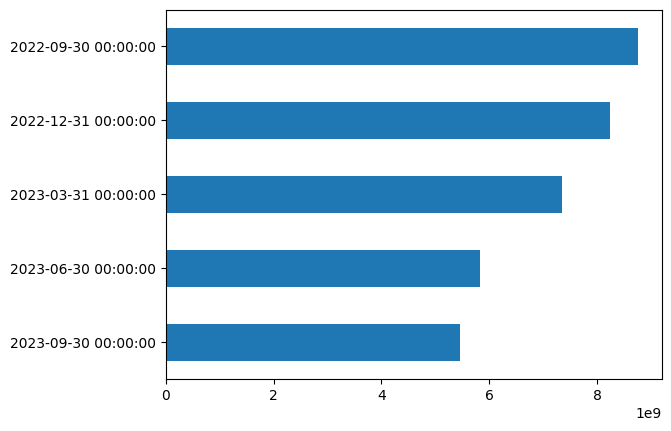

In [ ]:
dre['Net Income'].plot(kind='barh');

**Normalized EBITDA:** Refere-se ao Lucro Antes de Juros, Impostos, Depreciação e Amortização (EBITDA) ajustado para excluir efeitos atípicos, fornecendo uma visão mais "normalizada" do desempenho operacional.

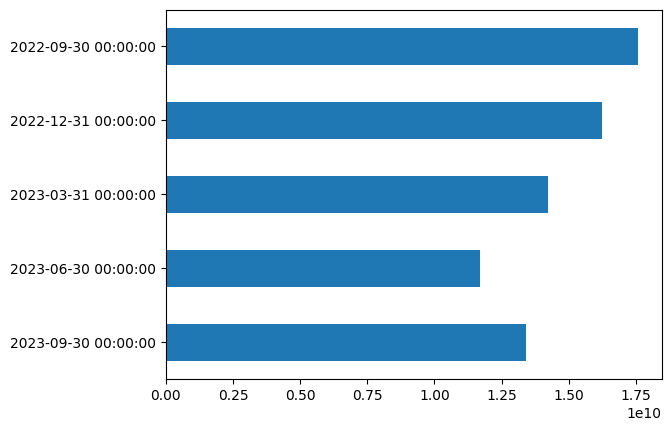

In [ ]:
dre['Normalized EBITDA'].plot(kind='barh');

**Operating Income:** Representa o lucro operacional obtido após a dedução de todas as despesas operacionais do total das receitas operacionais.

In [ ]:
dre['Operating Income']

2023-09-30    10795000000.0
2023-06-30     9121000000.0
2023-03-31    11811000000.0
2022-12-31    11521000000.0
2022-09-30    14359000000.0
Name: Operating Income, dtype: object

**Operating Revenue:** Refere-se à receita derivada das operações principais da empresa, excluindo receitas não operacionais.

In [ ]:
dre['Operating Revenue']

2023-09-30    25552000000.0
2023-06-30    22979000000.0
2023-03-31    26771000000.0
2022-12-31    30171000000.0
2022-09-30    32411000000.0
Name: Operating Revenue, dtype: object

**Other Non Operating Income Expenses:** Refere-se a receitas ou despesas não operacionais que não se enquadram em categorias específicas, proporcionando uma visão geral de outros eventos financeiros fora das operações principais da empresa.

In [ ]:
dre['Other Non Operating Income Expenses']

2023-09-30    -624000000.0
2023-06-30    -706000000.0
2023-03-31    -679000000.0
2022-12-31    1525000000.0
2022-09-30    -236000000.0
Name: Other Non Operating Income Expenses, dtype: object

**Pretax Income:** Indica o lucro antes de considerar a provisão para impostos.

In [ ]:
dre['Pretax Income']

2023-09-30     7747000000.0
2023-06-30     8435000000.0
2023-03-31    10966000000.0
2022-12-31    11283000000.0
2022-09-30    12678000000.0
Name: Pretax Income, dtype: object

**Selling And Marketing Expense:** Refere-se às despesas relacionadas a atividades de venda e marketing, incluindo custos associados a publicidade, promoção, comissões de vendas e outros gastos específicos para impulsionar as vendas.

In [ ]:
dre['Selling And Marketing Expense']

2023-09-30    1102000000.0
2023-06-30    1022000000.0
2023-03-31    1026000000.0
2022-12-31    1066000000.0
2022-09-30     973000000.0
Name: Selling And Marketing Expense, dtype: object

**Total Revenue:** Representa a receita total gerada pela empresa, incluindo vendas de produtos ou serviços.

<Axes: >

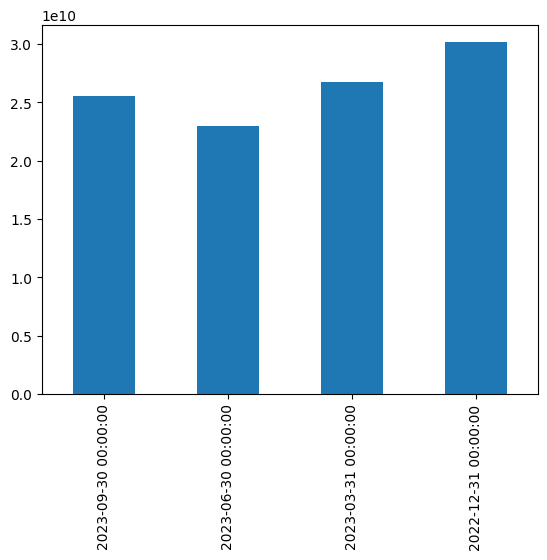

In [27]:
dre['Total Revenue'].plot(kind='bar')

DOWNLOAD DOS DADOS

In [ ]:
eda = dre[['Basic EPS','Basic Average Shares','Cost Of Revenue','General And Administrative Expense','Gross Profit','Net Income', 'Total Revenue', 'Operating Revenue']]
eda= eda.rename(columns={'Basic EPS':'Lucro_p/acao', 'Basic Average Shares':'QtdeAcoesCirc.', 'Cost Of Revenue':'CustosProducao',
                           'Gross Profit':'LucroBruto', 'General And Administrative Expense':'Despesas_ADM', 'Net Income':'LucroLIQ',
                           'Operating Revenue':'ReceitasOp', 'Total Revenue':'ReceitaTotal'})
eda.astype(np.float32, copy=False)
eda.reset_index(inplace=True)
eda1 = eda.rename(columns={'index': 'Trimestre'})
eda1.set_index('Trimestre')

,Lucro_p/acao,QtdeAcoesCirc.,CustosProducao,Despesas_ADM,LucroBruto,LucroLIQ,ReceitaTotal,ReceitasOp
Trimestre,,,,,,,,
2023-09-30,0.419194,13015465561.0,11982000000.0,734000000.0,13570000000.0,5456000000.0,25552000000.0,25552000000.0
2023-06-30,0.45,13044201261.0,11342000000.0,680000000.0,11637000000.0,5828000000.0,22979000000.0,22979000000.0
2023-03-31,0.56,13044201261.0,12658000000.0,671000000.0,14113000000.0,7341000000.0,26771000000.0,26771000000.0
2022-12-31,0.632082,13044201261.0,15592000000.0,608000000.0,14579000000.0,8245000000.0,30171000000.0,30171000000.0
2022-09-30,0.671793,13044201261.0,15875000000.0,676000000.0,16536000000.0,8763000000.0,32411000000.0,32411000000.0


In [ ]:
eda1.to_excel('petr3.xlsx')

### Pré-processamento

In [32]:
#Backup
df = dados

In [43]:
# Desindexando a coluna da data
dados = dados.reset_index()
# Passando-a para o formato data
dados['Date'] = pd.to_datetime(dados['Date'])
# carregando um df para os modelos
df = dados[['Date','Close']]
df['Preco'] = df['Close'].round(2)
df.drop('Close',axis=1, inplace=True)
df = df.dropna()  # Remover valores nulos
df.tail(4)

,Date,Preco
153,2024-01-12,39.64
154,2024-01-15,40.04
155,2024-01-16,39.60
156,2024-01-17,39.30


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    157 non-null    datetime64[ns]
 1   Preco   157 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


### ARIMA

ARIMA é uma das técnicas mais importantes de previsão de séries temporais.

Vamos utilizar o parametro automatico, pois ele calcula o manual e de qualquer forma nos mostrará o melhor modelo.

#### Sobre p, d e q

Os parâmetros p, d e q são componentes fundamentais do modelo ARIMA e desempenham papéis específicos na modelagem de séries temporais. Vamos entender o significado de cada um deles:

* p (ordem autoregressiva):

O parâmetro p representa o número de termos autoregressivos no modelo. Esses termos autoregressivos são essencialmente lags (atrasos) das observações anteriores. Um valor de p igual a 2, por exemplo, indica que o modelo ARIMA incluirá informações dos dois períodos de tempo anteriores.

* d (ordem de diferenciação):

O parâmetro d representa o número de vezes que a série temporal é diferenciada. A diferenciação é uma técnica para tornar a série estacionária, removendo tendências e padrões de sazonalidade. Se a série temporal já for estacionária, d pode ser igual a 0. Caso contrário, você experimenta diferentes valores de d até atingir estacionariedade.

* q (ordem da média móvel):

O parâmetro q representa o número de termos da média móvel no modelo. Os termos da média móvel incorporam a informação do erro residual dos termos anteriores. Assim como em p, um valor de q igual a 2 significa que o modelo ARIMA considerará os dois últimos erros residuais.


Em resumo, p está relacionado aos termos autoregressivos, d está relacionado à diferenciação para tornar a série estacionária, e q está relacionado aos termos da média móvel. Determinar os valores adequados para esses parâmetros é um processo empírico que geralmente envolve análise gráfica, como gráficos ACF (função de autocorrelação) e PACF (função de autocorrelação parcial), além de testes estatísticos. A escolha adequada desses parâmetros é crucial para a eficácia do modelo ARIMA na previsão da série temporal.

#### Código

In [72]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Parâmetros
p = 1
d = 2
q = 1

periodos= 11

# Ajuste o modelo ARIMA
modelo = ARIMA(df['Preco'], order=(p, d, q))
model_fit = modelo.fit()

# Crie um DataFrame para armazenar as datas futuras
datas_futuras = pd.date_range(start=df['Date'].max(), periods=periodos, freq='D')[1:]

# Faça previsões para os próximos 10 dias
previsoes_arima = model_fit.get_forecast(steps=10)

# Extraia os resultados
resultados_arima = previsoes_arima.summary_frame()

# Atualize os índices das previsões
resultados_arima.index = datas_futuras
resultados_arima

Preco,mean,mean_se,mean_ci_lower,mean_ci_upper
2024-01-18,39.405748,0.718491,37.997532,40.813965
2024-01-19,39.459006,0.955650,37.585966,41.332046
2024-01-20,39.519054,1.153557,37.258125,41.779984
2024-01-21,39.578224,1.323362,36.984483,42.171965
2024-01-22,39.637507,1.475569,36.745445,42.529570
2024-01-23,39.696776,1.615071,36.531295,42.862257
2024-01-24,39.756047,1.744928,36.336051,43.176042
2024-01-25,39.815317,1.867152,36.155766,43.474868
2024-01-26,39.874587,1.983156,35.987674,43.761501
2024-01-27,39.933858,2.093972,35.829747,44.037968


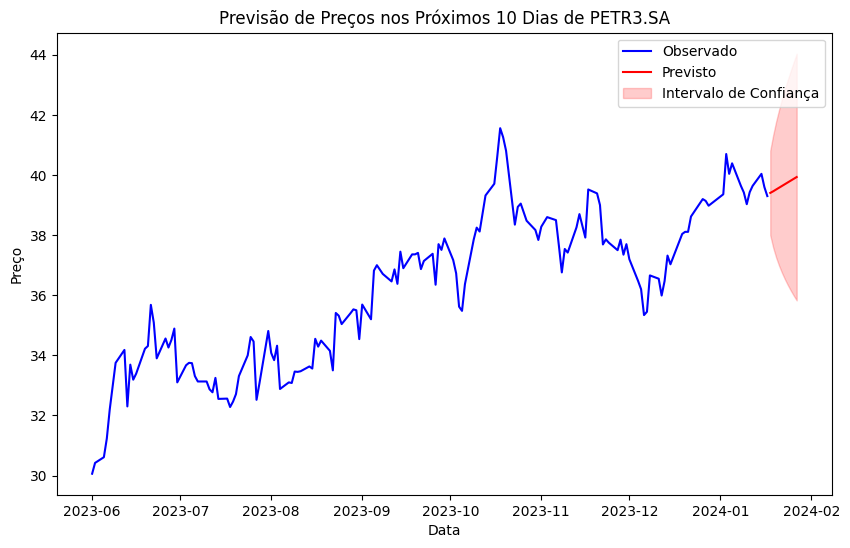

In [70]:
# Plot as observações e as previsões em um gráfico
plt.figure(figsize=(10, 6))

# Plot das observações
plt.plot(df['Date'], df['Preco'], label='Observado', color='blue')

# Plot das previsões
plt.plot(resultados_arima.index, resultados_arima['mean'], label='Previsto', color='red')

# Preencha a área entre os intervalos de confiança
plt.fill_between(resultados_arima.index, resultados_arima['mean_ci_lower'], resultados_arima['mean_ci_upper'], color='red', alpha=0.2, label='Intervalo de Confiança')

# Adicione rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title(f'Previsão de Preços nos Próximos 10 Dias de {ticker}')
plt.legend()

# Exiba o gráfico
plt.show()

In [94]:
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA

dias = 20 # não esquecer de alterar também o tamanho do 'datas_futuras' para novas observações

# Ajuste o modelo ARIMA
modelo_arima = ARIMA(df['Preco'], order=(1, 2, 1))  # Substitua p, d, q pelos valores adequados
resultado_arima = modelo_arima.fit()

# Crie um DataFrame para armazenar as datas futuras
datas_futuras = pd.date_range(start=dados['Date'].max(), periods=21, freq='D')[1:]

# Faça previsões para os próximos 10 dias
previsoes_arima = resultado_arima.get_forecast(steps=dias)

# Extraia os resultados
resultados_arima = previsoes_arima.summary_frame()

# Atualize os índices das previsões
resultados_arima.index = datas_futuras

# Crie o gráfico interativo usando plotly
fig = go.Figure()

# Adicione as observações
fig.add_trace(go.Scatter(x=df['Date'], y=df['Preco'], mode='lines', name='Observado', line=dict(color='blue')))

# Adicione as previsões
fig.add_trace(go.Scatter(x=datas_futuras, y=resultados_arima['mean'], mode='lines', name='Previsto', line=dict(color='red')))

# Adicione a área entre os intervalos de confiança
fig.add_trace(go.Scatter(x=datas_futuras, y=resultados_arima['mean_ci_upper'], fill=None, mode='lines', line=dict(color='red'), showlegend=False))
fig.add_trace(go.Scatter(x=datas_futuras, y=resultados_arima['mean_ci_lower'], fill='tonexty', mode='lines', line=dict(color='red'), name='Intervalo de Confiança'))

# Atualize o layout
fig.update_layout(title=f'Previsão de Preços nos Próximos {dias} dias para {ticker}',
                  xaxis=dict(title='Data'),  yaxis=dict(title='Preço'))

# Exiba o gráfico
fig.show()

### ML - AutoTS

In [ ]:
!pip install autots

In [97]:
from autots import AutoTS

# Modelando os dados
modelo_auto = AutoTS(forecast_length= 10, frequency='infer', ensemble='simple', drop_data_older_than_periods=90) # selecionando as variaveis e prevendo os dados dos prox 10 dias (demora)
modelo_auto = modelo_auto.fit(df, date_col='Date', value_col='Preco', id_col=None) # diminuir os parametros caso queira ir mais rapido

Data frequency is: B, used frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
3/3 [==============================] - 9s 16ms/step - loss: 0.3489
Epoch 2/50
3/3 [==============================] - 0s 11ms/step - loss: 0.3419
Epoch 3/50
3/3 [==============================] - 0s 10ms/step - loss: 0.3317
Epoch 4/50
3/3 [==============================] - 0s 10ms/step - loss: 0.3290
Epoch 5/50
3/3 [==============================] - 0s 8ms/step - l

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 161 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 161 in generation 0: SectionalMotif
Model Number: 162 with model AverageValueNaive in generation 0 of 10
Model Number: 163 with model VAR in generation 0 of 10
Template Eval Error: IndexError('tuple index out of range') in model 163 in generation 0: VAR
Model Number: 164 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 164 in generation 0: DatepartRegression
Model Number: 165 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 165 in generation 0: WindowRegression
Model Number: 166 with model GLS in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 166 in generation 0: GLS

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 346 with model LastValueNaive in generation 2 of 10
Model Number: 347 with model MultivariateMotif in generation 2 of 10
Model Number: 348 with model GLS in generation 2 of 10
Model Number: 349 with model SeasonalNaive in generation 2 of 10
Model Number: 350 with model UnobservedComponents in generation 2 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 350 in generation 2: UnobservedComponents
Model Number: 351 with model UnivariateRegression in generation 2 of 10
Model Number: 352 with model NVAR in generation 2 of 10
Model Number: 353 with model Theta in generation 2 of 10
Model Number: 354 with model ConstantNaive in generation 2 of 10
Model Number: 355 with model NVAR in generation 2 of 10
Model Number: 356 with model SectionalMotif in generation 2 of 10
Model Number: 357 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (66)') in model 357 in generation 2: SectionalMo

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



Model Number: 581 with model LastValueNaive in generation 4 of 10
Model Number: 582 with model UnobservedComponents in generation 4 of 10
Model Number: 583 with model UnivariateRegression in generation 4 of 10
Model Number: 584 with model ARIMA in generation 4 of 10
Model Number: 585 with model NVAR in generation 4 of 10
Model Number: 586 with model WindowRegression in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 586 in generation 4: WindowRegression
Model Number: 587 with model SeasonalNaive in generation 4 of 10
Model Number: 588 with model ConstantNaive in generation 4 of 10
Model Number: 589 with model ConstantNaive in generation 4 of 10
Model Number: 590 with model Theta in generation 4 of 10
Model Number: 591 with model ConstantNaive in generation 4 of 10
Model Number: 592 with model GLS in generation 4 of 10
Model Number: 593 with model ConstantNaive in generation 4 of 10
Model Number: 594 with model MultivariateRegression in gener

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 677 with model ConstantNaive in generation 4 of 10
Model Number: 678 with model NVAR in generation 4 of 10
Model Number: 679 with model ConstantNaive in generation 4 of 10
Model Number: 680 with model ETS in generation 4 of 10
Model Number: 681 with model GLM in generation 4 of 10
Model Number: 682 with model SeasonalNaive in generation 4 of 10
Model Number: 683 with model GLM in generation 4 of 10
Model Number: 684 with model ETS in generation 4 of 10
Model Number: 685 with model SectionalMotif in generation 4 of 10
Model Number: 686 with model LastValueNaive in generation 4 of 10
New Generation: 5 of 10
Model Number: 687 with model ETS in generation 5 of 10
Model Number: 688 with model UnivariateMotif in generation 5 of 10
Model Number: 689 with model ARIMA in generation 5 of 10
Model Number: 690 with model AverageValueNaive in generation 5 of 10
Model Number: 691 with model UnobservedComponents in generation 5 of 10
Model Number: 692 with model FBProphet in generation 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Epoch 1/50
2/2 [==============================] - 9s 2s/step - loss: 367261220864.0000 - val_loss: 121326845952.0000
Epoch 2/50
2/2 [==============================] - 3s 2s/step - loss: 349555458048.0000 - val_loss: 120638390272.0000
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 329807167488.0000 - val_loss: 118605971456.0000
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 355100327936.0000 - val_loss: 115940515840.0000
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 379416018944.0000 - val_loss: 113538580480.0000
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 347507195904.0000 - val_loss: 110828650496.0000
Epoch 7/50
2/2 [==============================] - 3s 1s/step - loss: 314820395008.0000 - val_loss: 108071387136.0000
Epoch 8/50
2/2 [==============================] - 2s 1s/step - loss: 350007328768.0000 - val_loss: 105194029056.0000
Epoch 9/50
2/2 [==============================] - 2s 1s/step - l

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 898 with model NVAR in generation 7 of 10
Model Number: 899 with model ARDL in generation 7 of 10
Model Number: 900 with model ETS in generation 7 of 10
Model Number: 901 with model MultivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer SeasonalDifference failed on fit') in model 901 in generation 7: MultivariateMotif
Model Number: 902 with model ARDL in generation 7 of 10
Model Number: 903 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 903 in generation 7: UnobservedComponents
Model Number: 904 with model SeasonalNaive in generation 7 of 10
Model Number: 905 with model GLM in generation 7 of 10
Model Number: 906 with model UnivariateRegression in generation 7 of 10
Model Number: 907 with model DatepartRegression in generation 7 of 10
Model Number: 908 with model ARDL in generation 7 of 10
Model Number: 909 with model ARDL in generation 7

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 910 with model NVAR in generation 7 of 10
Model Number: 911 with model MultivariateMotif in generation 7 of 10
Model Number: 912 with model SeasonalNaive in generation 7 of 10
Model Number: 913 with model SeasonalNaive in generation 7 of 10
Model Number: 914 with model MultivariateMotif in generation 7 of 10
Model Number: 915 with model ETS in generation 7 of 10
Model Number: 916 with model GLS in generation 7 of 10
Model Number: 917 with model DatepartRegression in generation 7 of 10
Model Number: 918 with model UnivariateMotif in generation 7 of 10
Model Number: 919 with model SectionalMotif in generation 7 of 10
Model Number: 920 with model LastValueNaive in generation 7 of 10
Model Number: 921 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 921 in generation 7: UnobservedComponents
Model Number: 922 with model Theta in generation 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 941 with model AverageValueNaive in generation 7 of 10
Model Number: 942 with model UnivariateRegression in generation 7 of 10
Model Number: 943 with model Theta in generation 7 of 10
Model Number: 944 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 944 in generation 7: UnobservedComponents
Model Number: 945 with model NVAR in generation 7 of 10
Model Number: 946 with model UnivariateMotif in generation 7 of 10
Model Number: 947 with model NVAR in generation 7 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 947 in generation 7: NVAR
Model Number: 948 with model AverageValueNaive in generation 7 of 10
Model Number: 949 with model GLS in generation 7 of 10
Model Number: 950 with model SeasonalNaive in generation 7 of 10
Model Number: 951 with model AverageValueNaive in generation 7 of 10
Model Number: 952 with model FBProphe

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 962 with model MultivariateRegression in generation 7 of 10
Model Number: 963 with model FBProphet in generation 7 of 10
Model Number: 964 with model FBProphet in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 964 in generation 7: FBProphet
Model Number: 965 with model AverageValueNaive in generation 7 of 10
Model Number: 966 with model AverageValueNaive in generation 7 of 10
Model Number: 967 with model GLS in generation 7 of 10
Model Number: 968 with model ARDL in generation 7 of 10
Model Number: 969 with model Theta in generation 7 of 10
Model Number: 970 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 970 in generation 7: MultivariateRegression
Model Number: 971 with model LastValueNaive in generation 7 of 10
Model Number: 972 with model UnivariateMotif in generation 7 of 10
Template Eval Er

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



New Generation: 8 of 10
Model Number: 987 with model MultivariateMotif in generation 8 of 10
Model Number: 988 with model LastValueNaive in generation 8 of 10
Model Number: 989 with model GLS in generation 8 of 10
Model Number: 990 with model UnobservedComponents in generation 8 of 10
Model Number: 991 with model GLS in generation 8 of 10
Model Number: 992 with model LastValueNaive in generation 8 of 10
Model Number: 993 with model UnobservedComponents in generation 8 of 10
Model Number: 994 with model WindowRegression in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 994 in generation 8: WindowRegression
Model Number: 995 with model UnobservedComponents in generation 8 of 10
Model Number: 996 with model FBProphet in generation 8 of 10
No anomalies detected.
Model Number: 997 with model NVAR in generation 8 of 10
Model Number: 998 with model MultivariateMotif in generation 8 of 10
Model Number: 999 with model GLM in generation

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1002 with model SeasonalNaive in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1002 in generation 8: SeasonalNaive
Model Number: 1003 with model Theta in generation 8 of 10
Model Number: 1004 with model AverageValueNaive in generation 8 of 10
Model Number: 1005 with model MultivariateRegression in generation 8 of 10
Model Number: 1006 with model DatepartRegression in generation 8 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 1006 in generation 8: DatepartRegression
Model Number: 1007 with model MultivariateRegression in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1007 in generation 8: MultivariateRegression
Model Number: 1008 with model SeasonalNaive in generation 8 of 10
Model Number: 1009 with model MultivariateMotif in generation 8 of 10
Model Number: 1010 with model UnivariateMotif in generation 8 of 10
Model Number: 1

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1046 with model AverageValueNaive in generation 8 of 10
Model Number: 1047 with model ConstantNaive in generation 8 of 10
Model Number: 1048 with model UnivariateRegression in generation 8 of 10
Model Number: 1049 with model ARDL in generation 8 of 10
Model Number: 1050 with model UnobservedComponents in generation 8 of 10
Model Number: 1051 with model UnivariateMotif in generation 8 of 10
Model Number: 1052 with model AverageValueNaive in generation 8 of 10
Model Number: 1053 with model UnivariateRegression in generation 8 of 10
Model Number: 1054 with model GLM in generation 8 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1054 in generation 8: GLM
Model Number: 1055 with model WindowRegression in generation 8 of 10
Model Number: 1056 with model ETS in generation 8 of 10
Model Number: 1057 with model ARIMA in generation 8 of 10
Template Eval Error: Exce

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1059 with model GLS in generation 8 of 10
Model Number: 1060 with model GLS in generation 8 of 10
Model Number: 1061 with model FBProphet in generation 8 of 10
Model Number: 1062 with model ConstantNaive in generation 8 of 10
Model Number: 1063 with model ARDL in generation 8 of 10
Model Number: 1064 with model UnivariateMotif in generation 8 of 10
Model Number: 1065 with model UnobservedComponents in generation 8 of 10
Model Number: 1066 with model ARDL in generation 8 of 10
Model Number: 1067 with model SeasonalNaive in generation 8 of 10
Model Number: 1068 with model ARIMA in generation 8 of 10
Model Number: 1069 with model Theta in generation 8 of 10
Model Number: 1070 with model ARDL in generation 8 of 10
Model Number: 1071 with model UnivariateRegression in generation 8 of 10
Model Number: 1072 with model MultivariateMotif in generation 8 of 10
Model Number: 1073 with model SeasonalNaive in generation 8 of 10
Model Number: 1074 with model MultivariateMotif in genera

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1110 with model ARDL in generation 9 of 10
Model Number: 1111 with model LastValueNaive in generation 9 of 10
Model Number: 1112 with model UnobservedComponents in generation 9 of 10
Model Number: 1113 with model LastValueNaive in generation 9 of 10
Model Number: 1114 with model ARDL in generation 9 of 10
Model Number: 1115 with model WindowRegression in generation 9 of 10
Model Number: 1116 with model UnivariateMotif in generation 9 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 1116 in generation 9: UnivariateMotif
Model Number: 1117 with model SeasonalNaive in generation 9 of 10
Model Number: 1118 with model UnobservedComponents in generation 9 of 10
Model Number: 1119 with model UnivariateRegression in generation 9 of 10
Model Number: 1120 with model LastValueNaive in generation 9 of 10
Model Number: 1121 with model SeasonalNaive in generation 9 of 10
Model Number: 1122 with model ARDL in generation 9 of 10
Model Number: 1123 with model ARDL in gen

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1161 with model UnobservedComponents in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1161 in generation 9: UnobservedComponents
Model Number: 1162 with model UnivariateMotif in generation 9 of 10
Model Number: 1163 with model AverageValueNaive in generation 9 of 10
Model Number: 1164 with model ARIMA in generation 9 of 10
Model Number: 1165 with model UnobservedComponents in generation 9 of 10
Model Number: 1166 with model LastValueNaive in generation 9 of 10
Model Number: 1167 with model NVAR in generation 9 of 10
Model Number: 1168 with model NVAR in generation 9 of 10
Model Number: 1169 with model UnivariateRegression in generation 9 of 10
Model Number: 1170 with model NVAR in generation 9 of 10
Model Number: 1171 with model GLS in generation 9 of 10
Model Number: 1172 with model UnivariateRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.")

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1231 in generation 10: ARDL
Model Number: 1232 with model NVAR in generation 10 of 10
Model Number: 1233 with model NVAR in generation 10 of 10
Model Number: 1234 with model ARDL in generation 10 of 10
Template Eval Error: ValueError("ARDL series Preco failed with error MissingDataError('exog contains inf or nans') exog train             HolidayFlag_US\nDate                      \n2023-09-14             0.0\n2023-09-15             0.0\n2023-09-18             0.0\n2023-09-19             0.0\n2023-09-20             0.0\n...                    ...\n2023-12-28             0.0\n2023-12-29             0.0\n2024-01-01             1.0\n2024-01-02             0.0\n2024-01-03             0.0\n\n[80 rows x 1 columns] and predict             HolidayFlag_US\n2024-01-04             0.0\n2024-01-05             0.0\n2024-01-08             0.0\n2024-01-09             0.0\n2024-01-10             0.0\n202

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



90 - GLM with avg smape 2.54: 
Model Number: 91 of 190 with model GLM for Validation 1
91 - GLM with avg smape 2.54: 
Model Number: 92 of 190 with model GLM for Validation 1
92 - GLM with avg smape 2.53: 
Model Number: 93 of 190 with model GLM for Validation 1
93 - GLM with avg smape 2.53: 
Model Number: 94 of 190 with model GLM for Validation 1
94 - GLM with avg smape 2.53: 
Model Number: 95 of 190 with model ConstantNaive for Validation 1
95 - ConstantNaive with avg smape 2.89: 
Model Number: 96 of 190 with model ConstantNaive for Validation 1
96 - ConstantNaive with avg smape 2.89: 
Model Number: 97 of 190 with model AverageValueNaive for Validation 1
97 - AverageValueNaive with avg smape 3.1: 
Model Number: 98 of 190 with model UnivariateRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



98 - UnivariateRegression with avg smape 2.59: 
Model Number: 99 of 190 with model UnivariateRegression for Validation 1
99 - UnivariateRegression with avg smape 3.3: 
Model Number: 100 of 190 with model UnivariateRegression for Validation 1
100 - UnivariateRegression with avg smape 2.59: 
Model Number: 101 of 190 with model SeasonalNaive for Validation 1
101 - SeasonalNaive with avg smape 3.1: 
Model Number: 102 of 190 with model SeasonalNaive for Validation 1
102 - SeasonalNaive with avg smape 3.1: 
Model Number: 103 of 190 with model SeasonalNaive for Validation 1
103 - SeasonalNaive with avg smape 3.1: 
Model Number: 104 of 190 with model MultivariateMotif for Validation 1
104 - MultivariateMotif with avg smape 2.84: 
Model Number: 105 of 190 with model UnivariateRegression for Validation 1
105 - UnivariateRegression with avg smape 2.12: 
Model Number: 106 of 190 with model UnivariateRegression for Validation 1
106 - UnivariateRegression with avg smape 2.12: 
Model Number: 107 of 1

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 115 of 190 with model ETS for Validation 1
115 - ETS with avg smape 2.89: 
Model Number: 116 of 190 with model ETS for Validation 1
116 - ETS with avg smape 2.89: 
Model Number: 117 of 190 with model ETS for Validation 1
117 - ETS with avg smape 2.89: 
Model Number: 118 of 190 with model ETS for Validation 1
118 - ETS with avg smape 2.89: 
Model Number: 119 of 190 with model ARIMA for Validation 1
119 - ARIMA with avg smape 3.21: 
Model Number: 120 of 190 with model ARIMA for Validation 1
120 - ARIMA with avg smape 3.21: 
Model Number: 121 of 190 with model GLM for Validation 1
121 - GLM with avg smape 2.93: 
Model Number: 122 of 190 with model GLS for Validation 1
122 - GLS with avg smape 2.86: 
Model Number: 123 of 190 with model GLS for Validation 1
123 - GLS with avg smape 2.86: 
Model Number: 124 of 190 with model GLS for Validation 1
124 - GLS with avg smape 2.86: 
Model Number: 125 of 190 with model GLS for Validation 1
125 - GLS with avg smape 2.86: 
Model Number:

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



90 - GLM with avg smape 1.87: 
Model Number: 91 of 190 with model GLM for Validation 2
91 - GLM with avg smape 1.87: 
Model Number: 92 of 190 with model GLM for Validation 2
92 - GLM with avg smape 1.87: 
Model Number: 93 of 190 with model GLM for Validation 2
93 - GLM with avg smape 1.87: 
Model Number: 94 of 190 with model GLM for Validation 2
94 - GLM with avg smape 1.87: 
Model Number: 95 of 190 with model ConstantNaive for Validation 2
95 - ConstantNaive with avg smape 2.55: 
Model Number: 96 of 190 with model ConstantNaive for Validation 2
96 - ConstantNaive with avg smape 2.55: 
Model Number: 97 of 190 with model AverageValueNaive for Validation 2
97 - AverageValueNaive with avg smape 1.95: 
Model Number: 98 of 190 with model UnivariateRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



98 - UnivariateRegression with avg smape 1.58: 
Model Number: 99 of 190 with model UnivariateRegression for Validation 2
99 - UnivariateRegression with avg smape 3.4: 
Model Number: 100 of 190 with model UnivariateRegression for Validation 2
100 - UnivariateRegression with avg smape 1.58: 
Model Number: 101 of 190 with model SeasonalNaive for Validation 2
101 - SeasonalNaive with avg smape 1.88: 
Model Number: 102 of 190 with model SeasonalNaive for Validation 2
102 - SeasonalNaive with avg smape 1.88: 
Model Number: 103 of 190 with model SeasonalNaive for Validation 2
103 - SeasonalNaive with avg smape 1.88: 
Model Number: 104 of 190 with model MultivariateMotif for Validation 2
104 - MultivariateMotif with avg smape 4.3: 
Model Number: 105 of 190 with model UnivariateRegression for Validation 2
105 - UnivariateRegression with avg smape 3.51: 
Model Number: 106 of 190 with model UnivariateRegression for Validation 2
106 - UnivariateRegression with avg smape 3.51: 
Model Number: 107 of

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



114 - ETS with avg smape 2.55: 
Model Number: 115 of 190 with model ETS for Validation 2
115 - ETS with avg smape 2.55: 
Model Number: 116 of 190 with model ETS for Validation 2
116 - ETS with avg smape 2.55: 
Model Number: 117 of 190 with model ETS for Validation 2
117 - ETS with avg smape 2.55: 
Model Number: 118 of 190 with model ETS for Validation 2
118 - ETS with avg smape 2.55: 
Model Number: 119 of 190 with model ARIMA for Validation 2
119 - ARIMA with avg smape 1.21: 
Model Number: 120 of 190 with model ARIMA for Validation 2
120 - ARIMA with avg smape 1.21: 
Model Number: 121 of 190 with model GLM for Validation 2
121 - GLM with avg smape 1.92: 
Model Number: 122 of 190 with model GLS for Validation 2
122 - GLS with avg smape 2.52: 
Model Number: 123 of 190 with model GLS for Validation 2
123 - GLS with avg smape 2.52: 
Model Number: 124 of 190 with model GLS for Validation 2
124 - GLS with avg smape 2.52: 
Model Number: 125 of 190 with model GLS for Validation 2
125 - GLS wit

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



90 - GLM with avg smape 2.57: 
Model Number: 91 of 190 with model GLM for Validation 3
91 - GLM with avg smape 2.57: 
Model Number: 92 of 190 with model GLM for Validation 3
92 - GLM with avg smape 2.58: 
Model Number: 93 of 190 with model GLM for Validation 3
93 - GLM with avg smape 2.58: 
Model Number: 94 of 190 with model GLM for Validation 3
94 - GLM with avg smape 2.58: 
Model Number: 95 of 190 with model ConstantNaive for Validation 3
95 - ConstantNaive with avg smape 4.91: 
Model Number: 96 of 190 with model ConstantNaive for Validation 3
96 - ConstantNaive with avg smape 4.91: 
Model Number: 97 of 190 with model AverageValueNaive for Validation 3
97 - AverageValueNaive with avg smape 2.1: 
Model Number: 98 of 190 with model UnivariateRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



98 - UnivariateRegression with avg smape 2.74: 
Model Number: 99 of 190 with model UnivariateRegression for Validation 3
99 - UnivariateRegression with avg smape 3.67: 
Model Number: 100 of 190 with model UnivariateRegression for Validation 3
Template Eval Error: ValueError('Input X contains NaN.\nDecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 100 in generation 0: UnivariateRegression
Model Number: 101 of 190 w

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



113 - ETS with avg smape 1.78: 
Model Number: 114 of 190 with model ETS for Validation 3
114 - ETS with avg smape 4.91: 
Model Number: 115 of 190 with model ETS for Validation 3
115 - ETS with avg smape 4.91: 
Model Number: 116 of 190 with model ETS for Validation 3
116 - ETS with avg smape 4.91: 
Model Number: 117 of 190 with model ETS for Validation 3
117 - ETS with avg smape 4.91: 
Model Number: 118 of 190 with model ETS for Validation 3
118 - ETS with avg smape 4.91: 
Model Number: 119 of 190 with model ARIMA for Validation 3
119 - ARIMA with avg smape 2.39: 
Model Number: 120 of 190 with model ARIMA for Validation 3
120 - ARIMA with avg smape 2.39: 
Model Number: 121 of 190 with model GLM for Validation 3
121 - GLM with avg smape 2.25: 
Model Number: 122 of 190 with model GLS for Validation 3
122 - GLS with avg smape 4.95: 
Model Number: 123 of 190 with model GLS for Validation 3
123 - GLS with avg smape 4.95: 
Model Number: 124 of 190 with model GLS for Validation 3
124 - GLS wit

In [101]:
# Modelo de Regressão Logística:
predicao = modelo_auto.predict()
previsao = predicao.forecast
previsao

,Preco
2024-01-18,39.451336
2024-01-19,39.248261
2024-01-22,39.192226
2024-01-23,39.136066
2024-01-24,39.118745
2024-01-25,39.122484
2024-01-26,39.024759
2024-01-29,38.872322
2024-01-30,38.944070
2024-01-31,39.131611


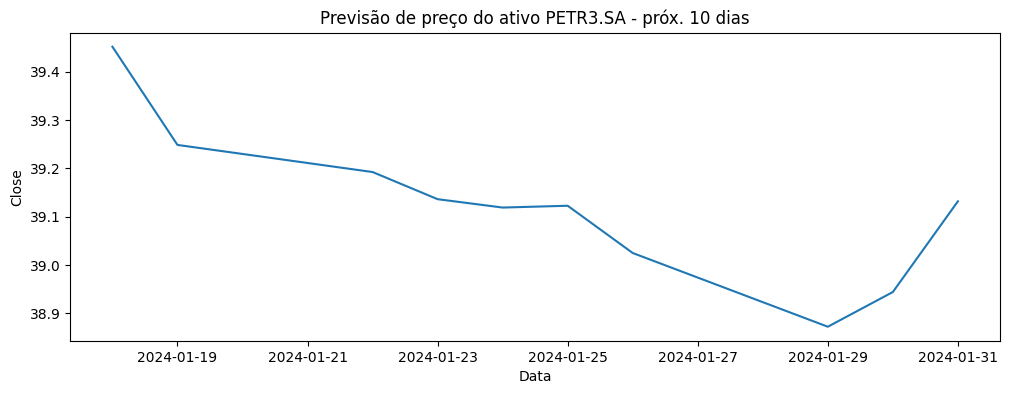

In [99]:
# Gráfico com as previsões dos próximos 10 dias
plt.figure(figsize=(12, 4))
plt.title(f"Previsão de preço do ativo {ticker} - próx. 10 dias")
plt.xlabel("Data")
plt.ylabel("Close")
plt.plot(previsao["Preco"])
plt.show();